### **Elioenai de Oliveira Morais**

Desafio do Titanic

Vou utilizar

**Pandas**
**Matplotlib e seaborn**
**Numpy**
**sklearn**


In [0]:
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

In [0]:
# Em alguns lugares da internet, já aconselham demarcar alguns parâmetros que serão usados em todo projeto
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [0]:
# Vamos ler os dados
data = pd.read_csv('train.csv')

In [76]:
data.shape # linhas e colunas

(891, 12)

In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# A coluna Survived é a que será o alvo
# Se Survived = 1, o passageiro sobreviveu, caso contrário, ele está morto.
# Ela é a variável que vamos prever. (predict)

# As outras variáveis ​​descrevem os passageiros. Eles são as features.

**PassengerId:** e identificação fornecida a cada viajante no barco

**Pclass:** a classe de passageiros. Possui três valores possíveis: 1,2,3 (primeira, segunda e terceira classe)

**Name** O nome do passageiro

**Sex** O sexo

**Age** A idade do passageiro

**SibSp:** número de irmãos e cônjuges que viajam com o passageiro

**Parch:** número de pais e filhos que viajam com o passageiro

**Ticket** O número do bilhete

**Fare** Tarifa do bilhete

**Cabin** O número da cabine

**Embarked** O embarque. Isto descreve três possibilidades do Titanic de onde as pessoas embarcam. Três valores possíveis S, C, Q

![alt text](http://visualoop.com/media/2015/04/TITANIC-1040x1573.jpg)

In [79]:
data.describe()
# investigar um pouco os dados

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# A coluna count mostra que 177 valores estão ausentes na coluna Age.
# Uma solução é preencher os valores nulos com a idade média.
# Também poderíamos imputar a idade média, mas a mediana é mais robusta para os discrepantes.
data['Age'] = data['Age'].fillna(data['Age'].median())

In [82]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Vamos agora fazer alguns gráficos.

Vamos visualizar a sobrevivência com base no gênero

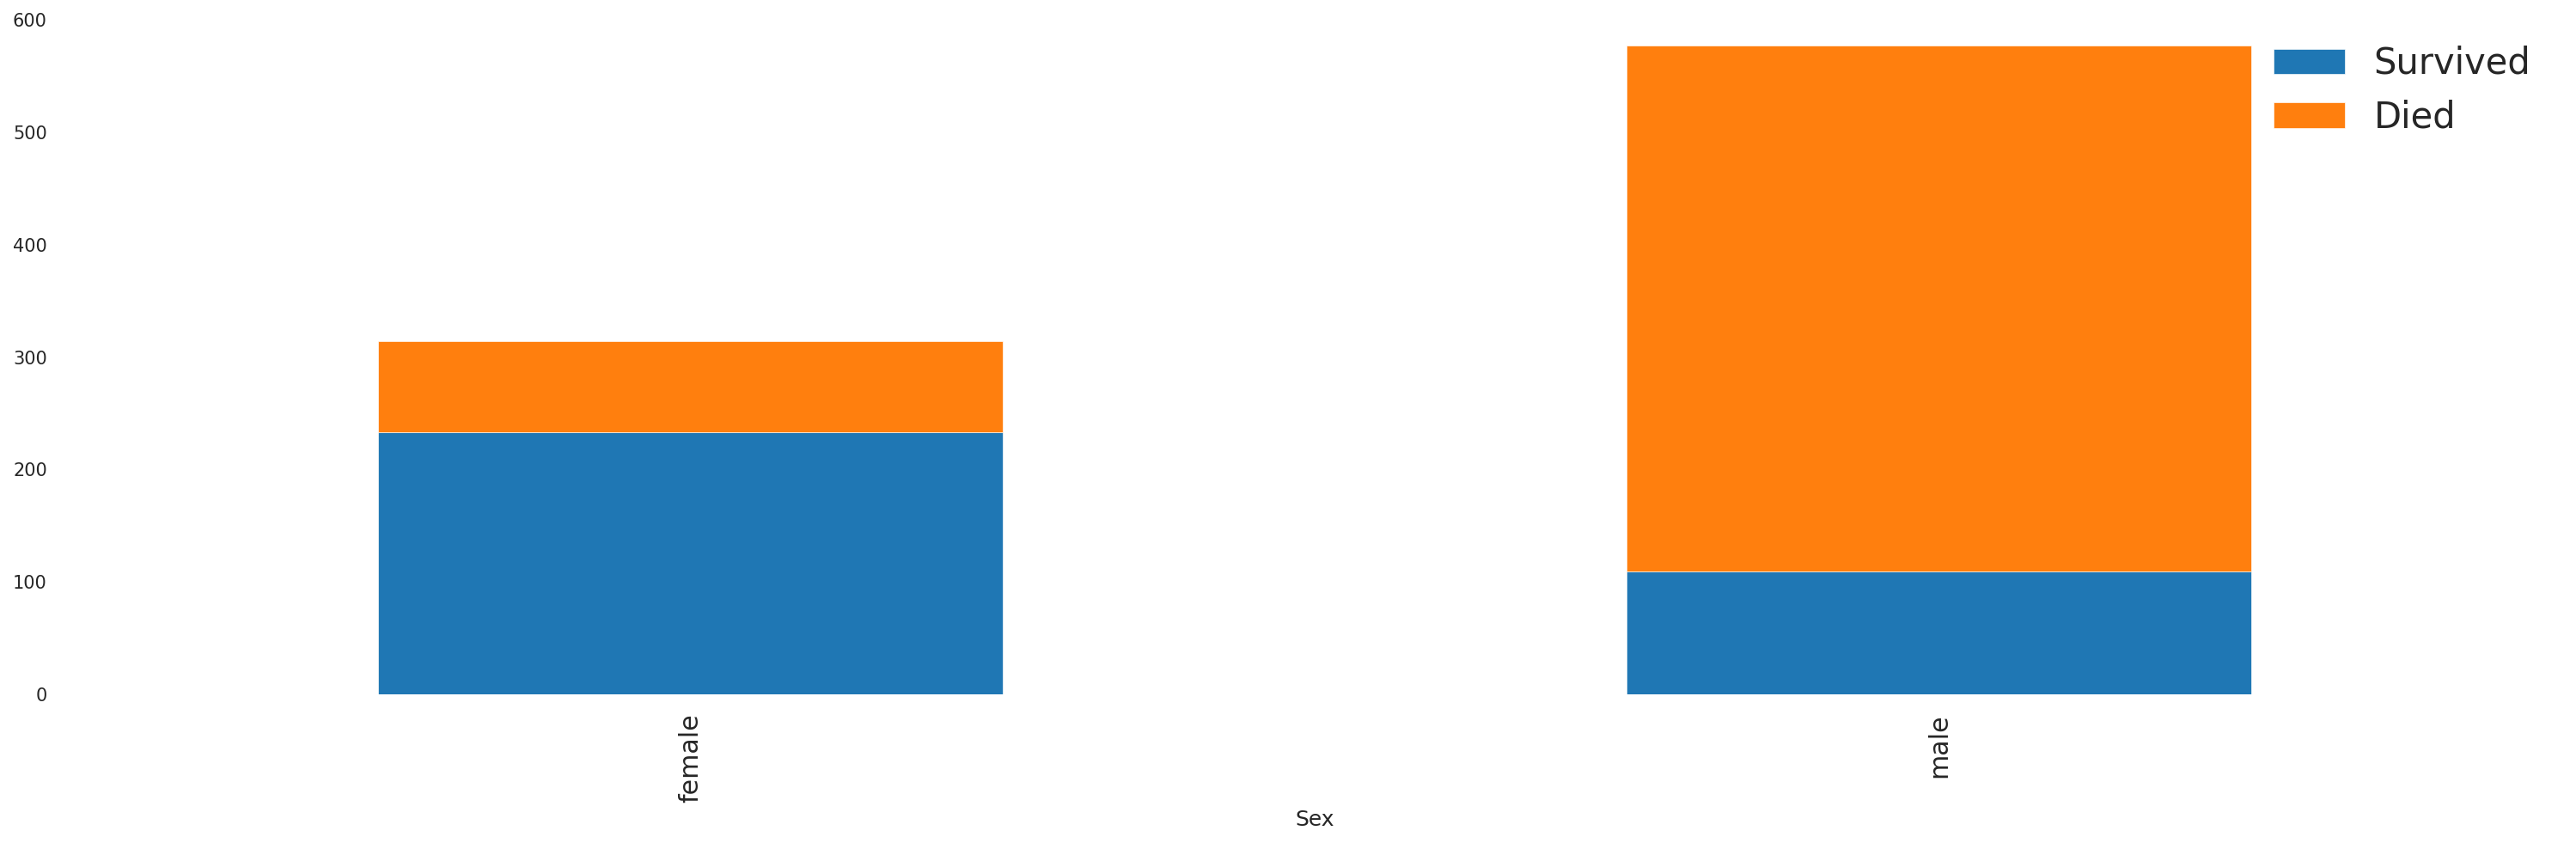

In [83]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True);

In [0]:
# Parece que os passageiros do sexo masculino são mais propensos a morrer.
# Vamos traçar o mesmo gráfico, mas com a proporção

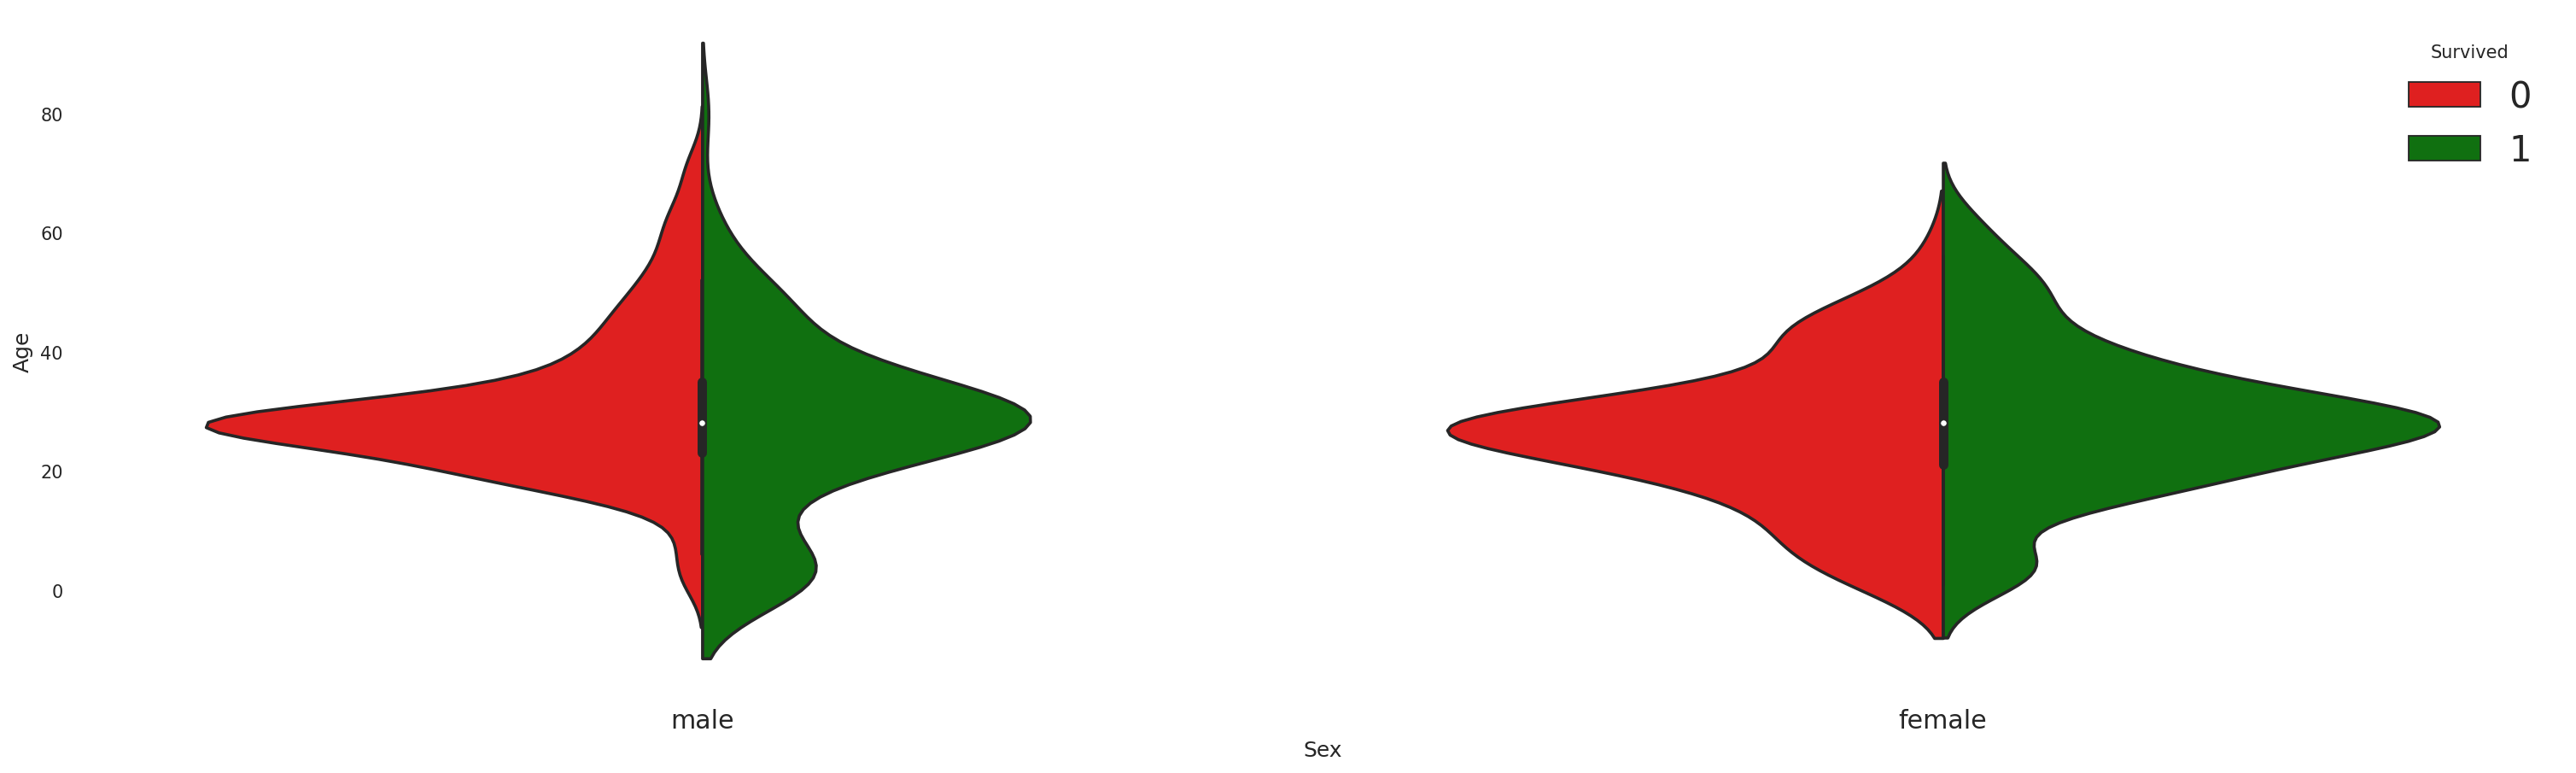

In [85]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

**Histograma** (invertido)

As mulheres sobrevivem mais que os homens, conforme representado pelo histograma verde feminino maior.

A idade condiciona a sobrevivência dos passageiros do sexo masculino:

Homens mais jovens tendem a sobreviver
Um grande número de passageiros entre 20 e 40 morre
A idade não parece ter um impacto direto na sobrevivência feminina

Essa análise confirma que um antigo código de conduta que marinheiros e capitães seguem em caso de situações ameaçadoras: "Mulheres e crianças primeiro!"

![alt text](https://am24.mediaite.com/tms/cnt/uploads/2012/01/titanic-sinking-lifeboats.jpg)


Vamos agora focar no bilhete de tarifa de cada passageiro e ver como isso pode afetar a sobrevivência

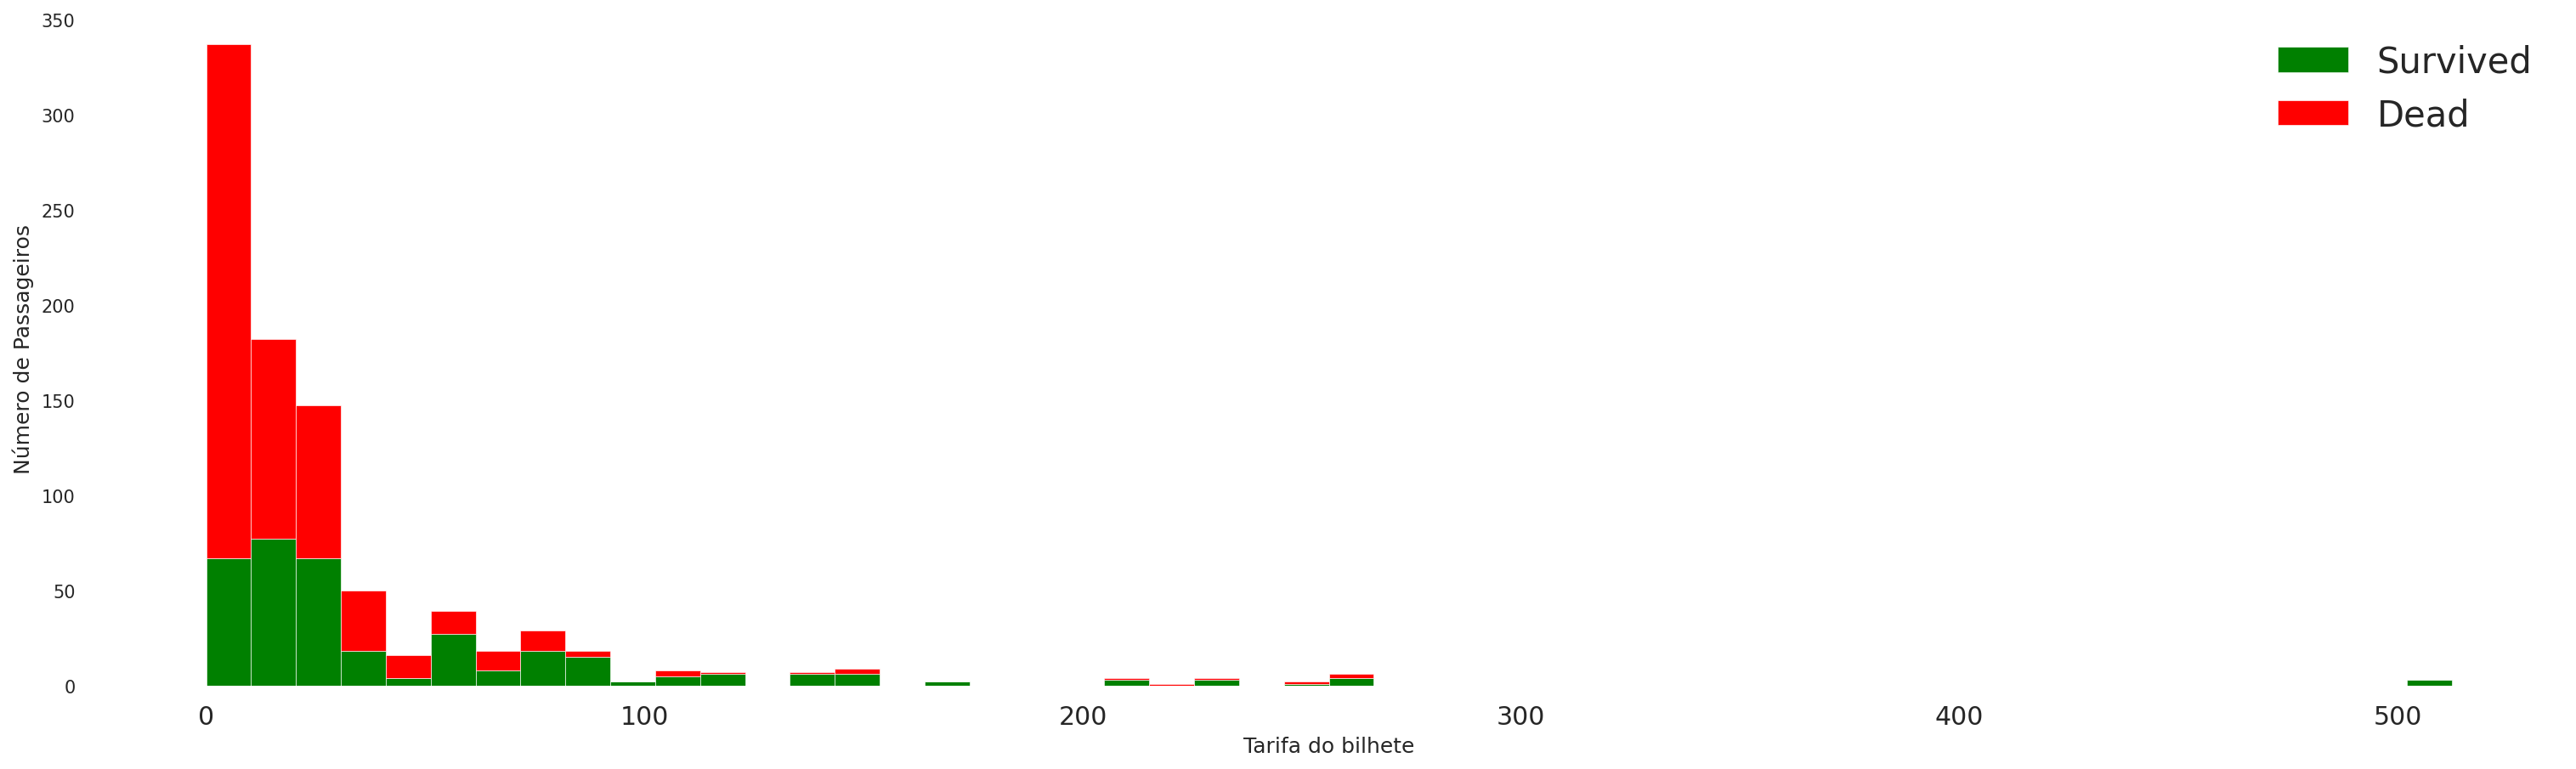

In [86]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Tarifa do bilhete')
plt.ylabel('Número de Passageiros')
plt.legend();

Os passageiros com tarifas mais baratas de bilhetes têm mais chances de morrer. Em outras palavras, passageiros com passagens mais caras e, portanto, um status social mais importante, parecem ser resgatados primeiro.

Vamos agora combinar idade, tarifa e sobrevivência em um único gráfico

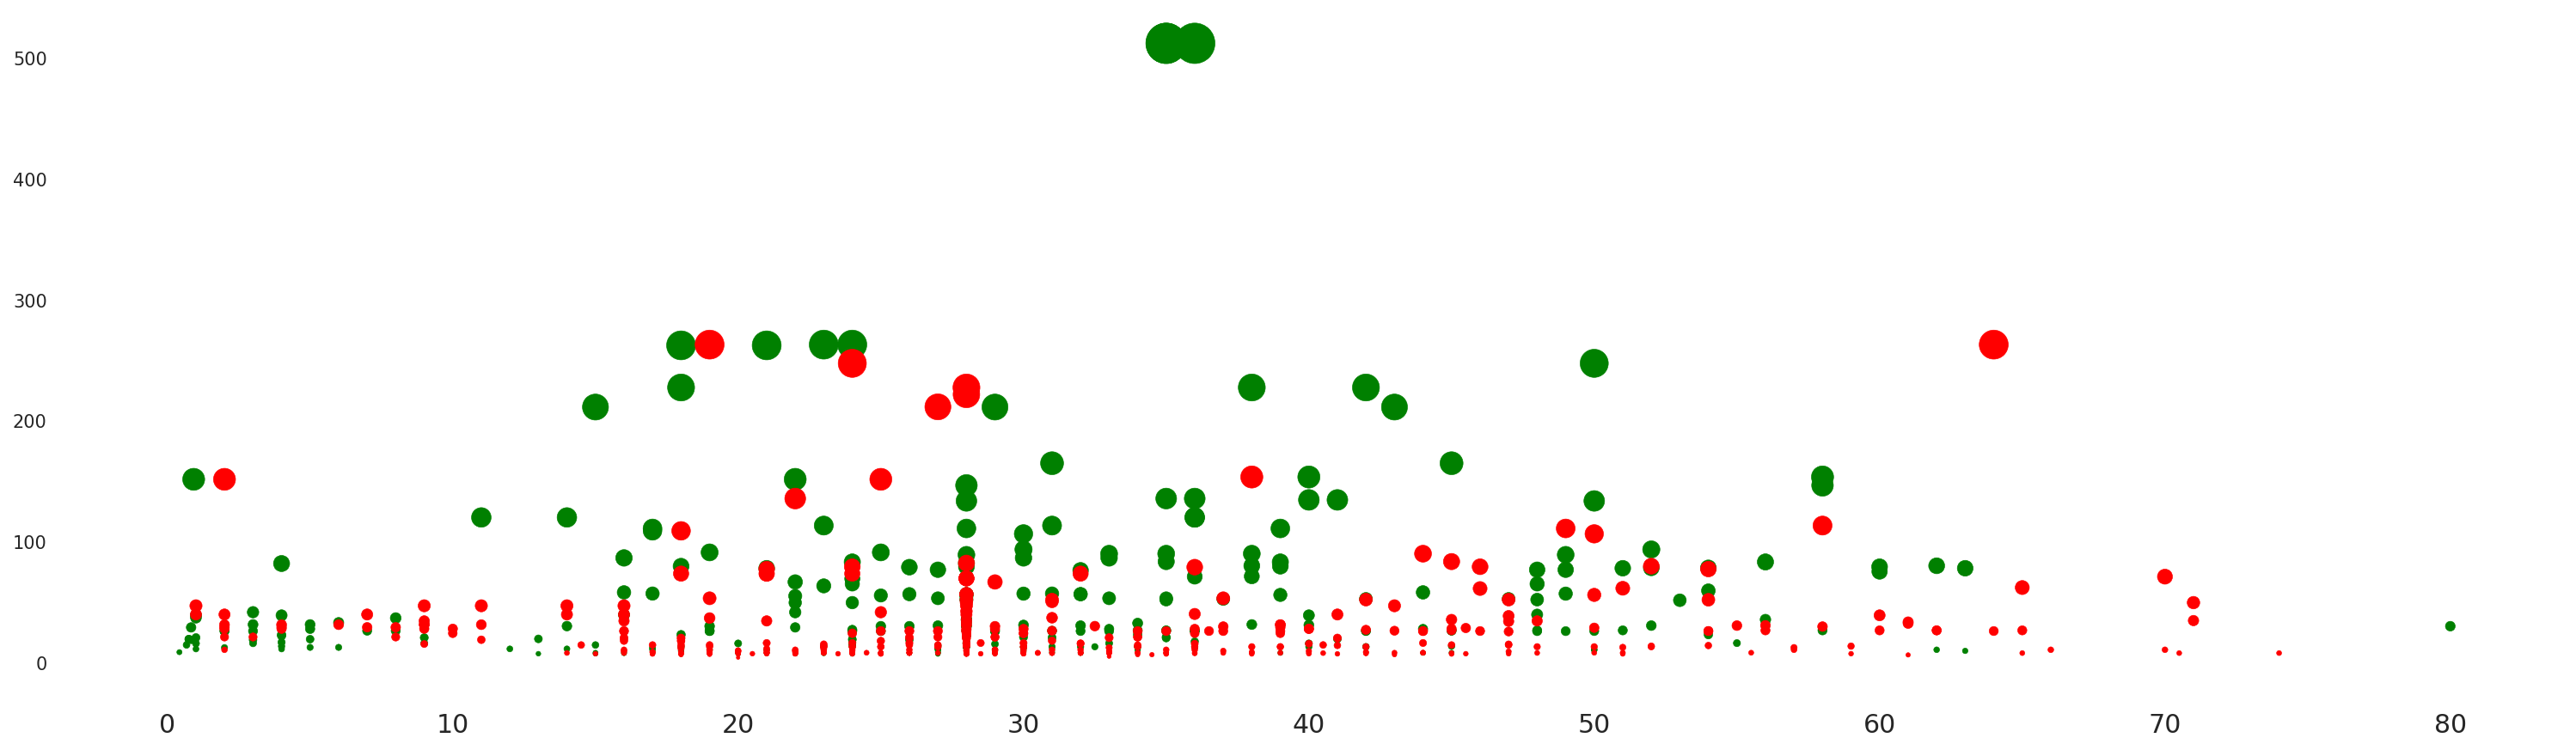

In [87]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

O tamanho dos círculos é proporcional à tarifa do bilhete.

No eixo x, temos as idades e o eixo y, consideramos a tarifa do bilhete.

Podemos observar diferentes agrupamentos:

Grandes pontos verdes entre x = 20 ex = 45: adultos com as maiores tarifas de ingressos
Pequenos pontos vermelhos entre x = 10 ex = 45, adultos de classes mais baixas no barco
Pequenos pontos de ganância entre x = 0 ex = 7: estes são os filhos que foram salvos
De fato, a tarifa do bilhete se correlaciona com a classe, como a vemos no gráfico abaixo

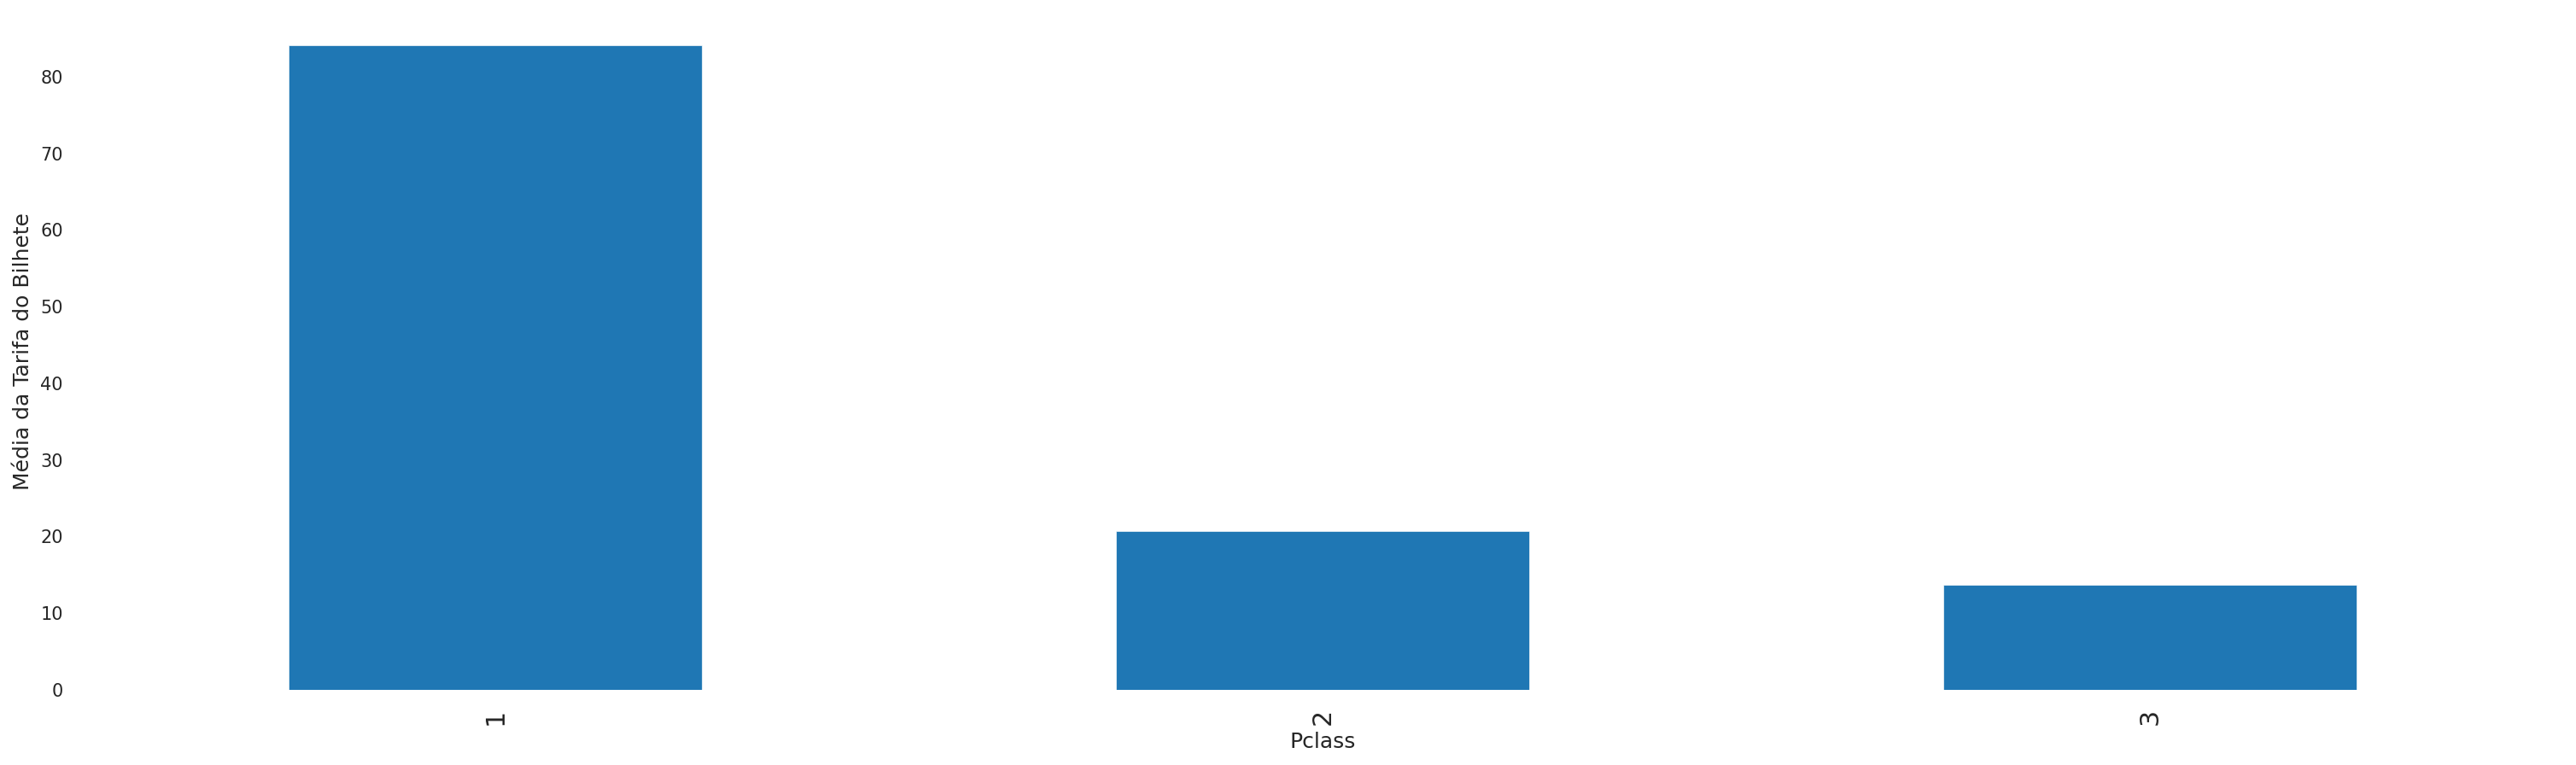

In [88]:
ax = plt.subplot()
ax.set_ylabel('Média da Tarifa do Bilhete')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

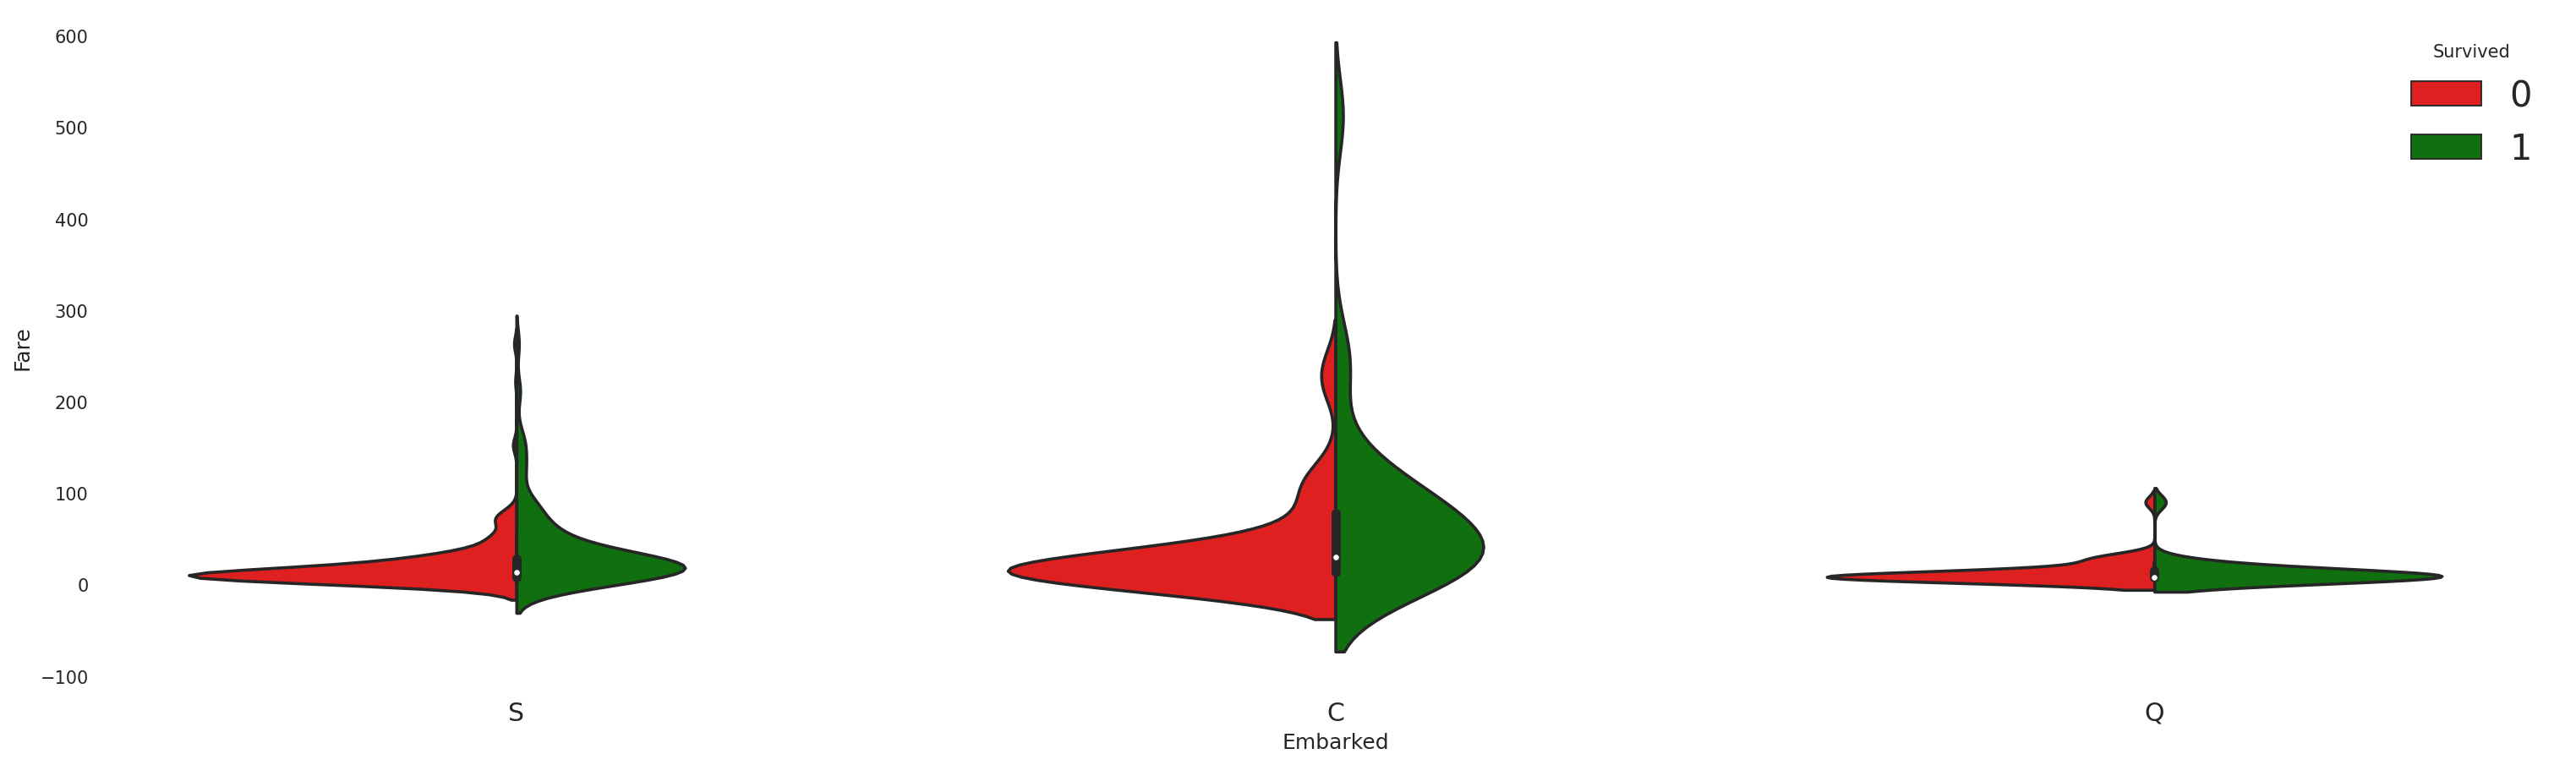

In [89]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

Parece que o embarque C possui uma variedade maior de passagens e, portanto, os passageiros que pagam os preços mais altos são os que sobrevivem.

Também vemos isso acontecendo no embarque S e menos no embarque Q.

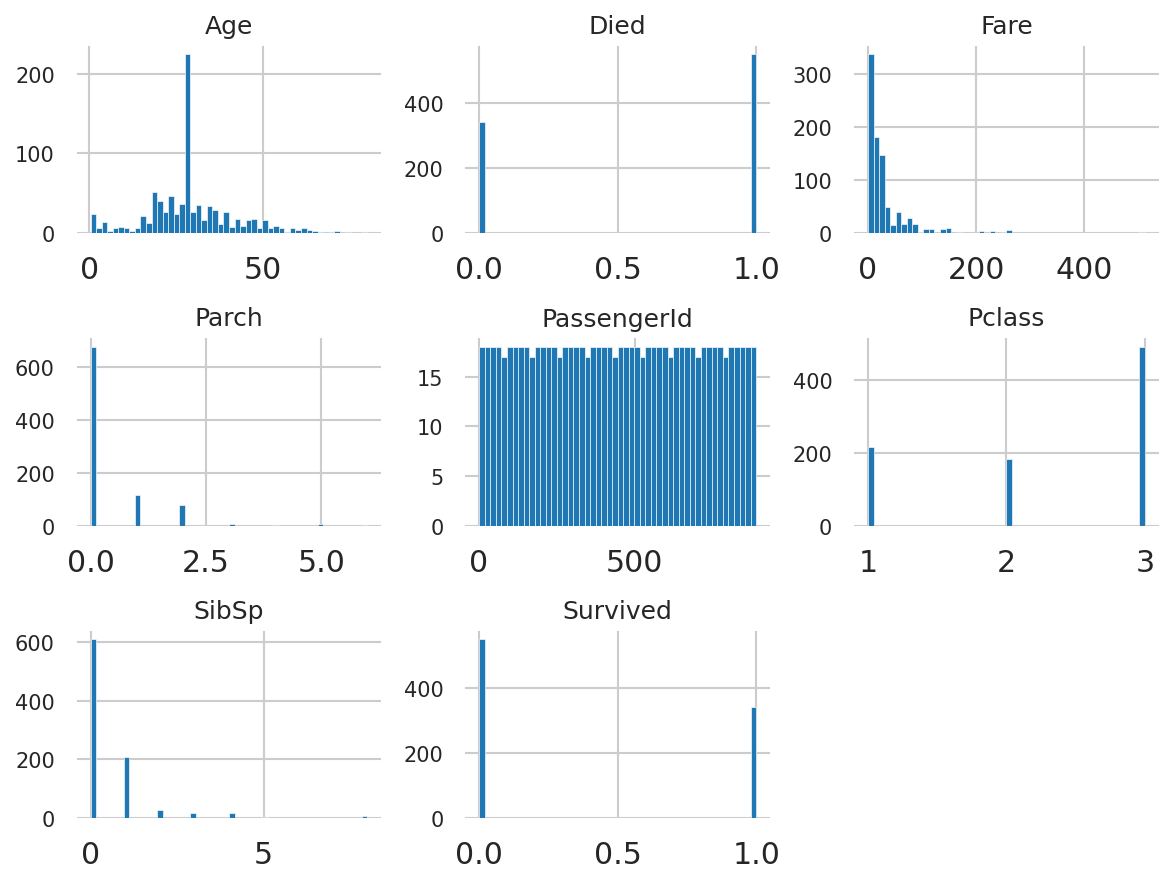

In [90]:
# Para cada variável, vou traçar aqui alguns gráficos
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(8,6))
plt.tight_layout()
plt.show()

Vou usar uma poderosa ferramenta para me dar mais informações sobre os dados (**Pandas Profiling**)

Vamos processar e transformar essas variáveis ​​de forma que os dados se tornem legíveis ​​pelo algoritmo de aprendizado de máquina.

Vamos rocessar variáveis ​​de texto como os nomes dos passageiros e integrar essas informações em nosso modelo.

Vou criar uma função (que vi na internet) de impressão só para checar se um recurso foi processado ou não.

In [0]:
def status(feature):
    print ('Processing', feature, ': ok')

Vou já anexar SEPARADO o conjunto de treinamento ao conjunto de testes.

In [0]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [0]:
combined = get_combined_data()

In [94]:
# Vamos ver o shape disso
combined.shape

(1309, 10)

In [0]:
# Treino e Teste estão "combinados"
# O número total de linhas (1309) é a soma exata do número de linhas no conjunto de trens e no conjunto de teste

In [96]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Vou separar os títulos dados de Mr., Miss., etc.**

No primeiros exemplos:

Braund, Sr. Owen Harris, Heikkinen, Miss Laina, Oliva e Ocana, Peter, Master. Michael J

Veja que cada nome possui um título. Pode ser uma simples Srta. Ou Sra., Mas às vezes pode ser algo mais sofisticado como Mestre, Senhor ou Dona. Nesse caso, podemos introduzir informações adicionais sobre o status social simplesmente analisando o nome e extraindo o título e convertendo em uma variável binária.

Vamos ver como faremos isso na função abaixo.

Vamos primeiro ver quais são os diferentes títulos no conjunto de treino

In [0]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [98]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [0]:
# Esta função analisa os nomes e extrai os títulos. Em seguida, mapeia os títulos 
# para categorias de títulos. Nós selecionamos

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # Extrair o título de cada nome
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [0]:
# Teremos:
#  - Officer
#  - Royalty
#  - Mr
#  - Mrs
#  - Miss
#  - Master

In [101]:
combined = get_titles()

Processing Title : ok


In [102]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [103]:
# Vamos verificar se os títulos foram preenchidos corretamente.
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [0]:
# De fato, existe um valor de NaN na linha 1305. De fato, o nome correspondente é Oliva e Ocana, Dona. Fermina.
# Este título não foi encontrado no conjunto de dados do treino.
# Temos uma coluna adicional chamada Título que contém as informações.

### **Processando Idades (Age)**

A variável Age estava com 177 valores ausentes. Este é um número grande (~ 13% do conjunto de dados). Simplesmente substituí-los pela idade média ou mediana pode não ser a melhor solução, pois a idade pode diferir por grupos e categorias de passageiros.


Para entender o motivo, vamos agrupar nosso conjunto de dados por sexo, título e classe de passageiro e, para cada subconjunto, calcular a idade média.

Vamos preencher as idades ausentes no treino usando o conjunto de treinos e preenchemos as idades no conjunto de testes usando valores calculados também.

**Número de idades ausentes no conjunto de teino**

In [105]:
combined.iloc[:891].Age.isnull().sum()

177

**Número de idades ausentes no conjunto de teste**

In [0]:
# Número de idades ausentes no conjunto de testes

In [107]:
combined.iloc[891:].Age.isnull().sum()

86

In [0]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [109]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


Atribuindo valores de idade ausentes com base em critérios diferentes.

Olhando a coluna da idade média e vejo como esse valor pode ser diferente com base no sexo, classe e título juntos

* Se o passageiro for do sexo feminino, da classe 1 e da realeza, a idade média é de 40,5 anos.

* Se o passageiro for do sexo masculino, da Pclass 3, com o título Mr, a idade média é 26.

* Vamos criar uma função que preencha a idade que falta, combinada com base nesses ATRIBUTOS DIFERENTES

In [0]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    #A função preenche valores faltantes da variável Age
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [111]:
combined = process_age()

Processing age : ok


As idades perdidas foram substituídas.

No entanto, notamos um valor ausente na Tarifa, dois valores ausentes no Embarked e muitos valores ausentes no Cabin. 

Vamos agora processar os nomes

In [0]:
def process_names():
    global combined
    # Limpando a variável Name
    combined.drop('Name', axis=1, inplace=True)
    
    # Como o Title é uma dumy, vou usar um "encoding"
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removendo a variável Title
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

Essa função descarta a coluna Name, pois não a usaremos mais porque criamos uma coluna Title.

Em seguida, codificamos os valores do title usando uma codificação fictícia.

In [113]:
combined = process_names()

Processing names : ok


In [114]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


Não temos mais a feature de name.

novas variáveis ​​(Title_X) apareceram. Esses recursos são binários.

Por exemplo, se Title_Mr = 1, o título correspondente é Mr

**Processando a  Fare (Tarifa)**

Vamos imputar o valor da tarifa ausente pela tarifa média calculada no conjunto de treino

In [0]:
def process_fares():
    global combined
    # trocando pela média
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [116]:
# Essa função simplesmente substitui um valor de tarifa ausente pela média.
combined = process_fares()

Processing fare : ok


**Processando Embarked**

In [0]:
def process_embarked():
    global combined
    # Preenchendo com os valores mais frequentes
    combined.Embarked.fillna('S', inplace=True)
    # Variável dummy
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [118]:
# Esta função substitui os dois valores ausentes de Embarked pelo valor mais freqüente de Embarked.
combined = process_embarked()

Processing embarked : ok


In [119]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


**Processando Cabine (Cabin)**

In [0]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [121]:
train_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

In [122]:
test_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'}

In [0]:
# Não temos nenhuma letra de cabine no conjunto de teste que não esteja presente no conjunto de treino

In [0]:
def process_cabin():
    global combined    
    # Mudando valor da Cabine com U (Uknown, traduzindo como Desconhecido)
    combined.Cabin.fillna('U', inplace=True)
    
    # Cada vaor da Cabin com letra
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # variável dummy
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('Cabin')
    return combined

Esta função substitui os valores de NaN por U (para Desconhecido)

Em seguida, mapeia cada valor de cabine para a primeira letra. Em seguida, ele codifica os valores da cabine usando a codificação fictícia novamente

In [125]:
combined = process_cabin()

Processing Cabin : ok


In [126]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


**Processando Sex**

In [0]:
def process_sex():
    global combined
    # Valores numéricos]
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [0]:
# Essa função mapeia os valores da cadeia masculino e feminino para 1 e 0, respectivamente

In [129]:
combined = process_sex()

Processing Sex : ok


**Processando PClass**

In [0]:
def process_pclass():
    
    global combined
    # teremos três categorias
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adicionando a dummy
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removendo "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [0]:
# Esta função codifica os valores de Pclass (1,2,3) usando uma codificação fictícia

In [132]:
combined = process_pclass()

Processing Pclass : ok


In [0]:
# Vamos primeiro ver como os diferentes prefixos de ticket que temos em nosso conjunto de dados

In [0]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [0]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [140]:
# Tamanho dos tickets
len(tickets)

37

In [0]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [0]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [145]:
len(tickets)

37

In [0]:
def process_ticket():
    
    global combined    
    # extraindo prefixo e retornando XXX
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'    

    # dummy
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [0]:
combined = process_ticket()
# Aqui ocorreu um erro, então preferi remover a feature 'Ticket' do treino e do test
# usei 
# test.drop(['Ticket'], 1, inplace=True)
# train.drop(['Ticket'], 1, inplace=True)

**Processando Family**

Esta parte inclui a criação de novas variáveis ​​com base no tamanho da família (o tamanho é a propósito, outra variável que criamos).

Essa criação de novas variáveis ​​é feita sob uma premissa realista: famílias grandes são agrupadas e, portanto, são mais propensas a serem resgatadas do que as pessoas que viajam sozinhas.

In [0]:
def process_family():
    
    global combined
    # Nova feature : tamanho das families
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # baseado no tamanho da família
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

FamilySize : Número total de parentes (him/her)self.

Sigleton :  Boolean com tamanho das familias = 1

SmallFamily : Boolean tamanho da familia entre 2 <=  e <= 4

LargeFamily : Boolean tamanho da familia menor que 5 <

In [153]:

combined = process_family()

Processing family : ok


In [154]:
combined.shape

(1309, 31)

In [0]:
# chegamos a 31 features.

In [156]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,1,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0


Nesta parte, usamos nosso conhecimento dos passageiros com base nos recursos que criamos e depois construímos um modelo estatístico. Você pode pensar nesse modelo como uma caixa que tritura as informações de qualquer novo passageiro e decide se ele sobrevive ou não.

Existe uma grande variedade de modelos a serem utilizados, desde regressão logística a árvores de decisão e modelos mais sofisticados, como florestas aleatórias e árvores com aumento de gradiente.

Usarei Random Forests e já temos

O conjunto de dados combinado no conjunto de trens e no conjunto de testes.

Use o conjunto de treino para criar um modelo preditivo.

Avalie o modelo usando o conjunto de treino

Teste o modelo usando o conjunto de testes e gere e arquivo de saída para o envio.

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Para avaliar nosso modelo, usaremos uma validação cruzada de 5 vezes com a precisão, já que é a métrica usada pela competição na tabela de classificação.

In [0]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Recuperando o conjunto de treino e o conjunto de testes do conjunto de dados combinados.

In [0]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [0]:
train, test, targets = recover_train_test_target()

São mais de 30 recursos até agora, mas talvez cheguemos a diminuir a dimensionalidade selecionando o número "correto" de features que capturam o essencial.

A seleção correta de features traz muitos benefícios:

Reduz a redundância entre os dados

Acelera o processo de treinamento

Reduz overfitting

Estimadores baseados em árvores podem ser usados ​​para calcular as importâncias das features, que por sua vez podem ser usados ​​para descartar recursos irrelevantes.

In [174]:
combined.head(200)

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,58.0,0,0,146.5208,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
196,1,26.0,0,0,7.7500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
197,1,42.0,0,1,8.4042,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2,0,1,0
198,0,18.0,0,0,7.7500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0


In [0]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [0]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

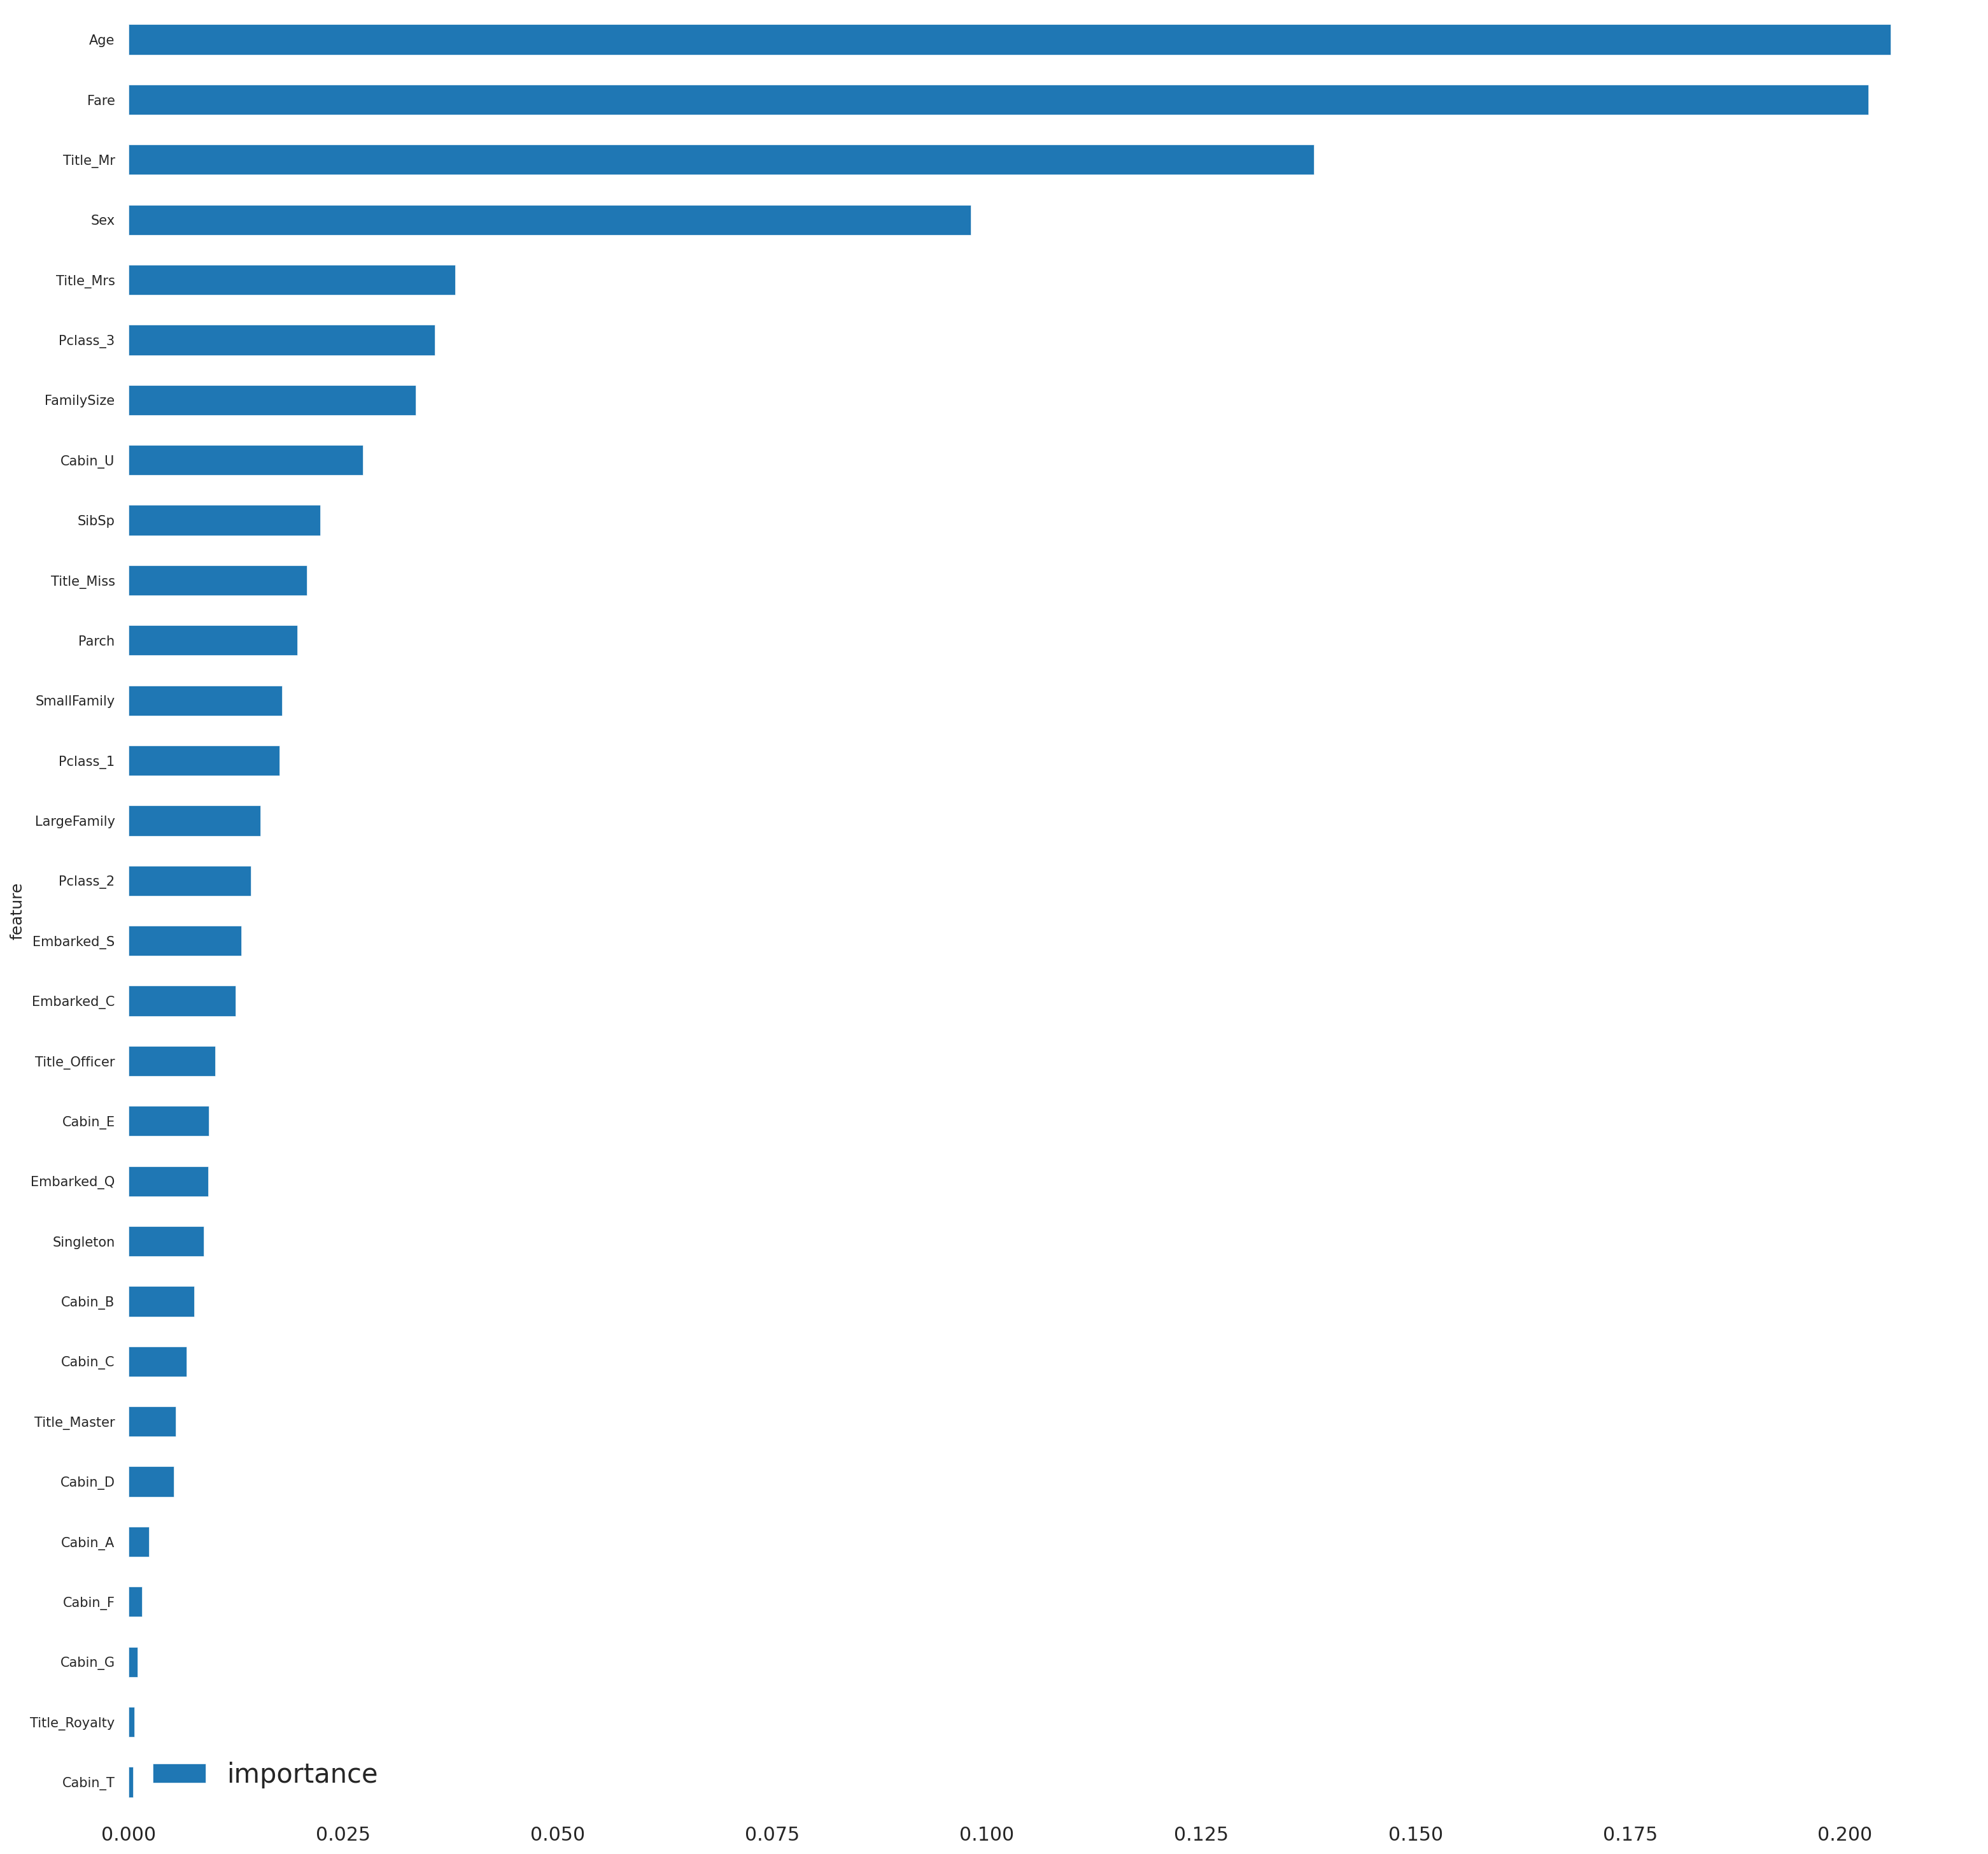

In [180]:
# Verificando a importancia das features
features.plot(kind='barh', figsize=(25, 25))

Notei uma grande importância vinculada a Title_Mr, Idade, Tarifa e Sexo.

Também uma correlação importante com o Passenger_Id.

Vou fazer um dataset menor

In [181]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 7)

In [184]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 7)

**Vamos lá...**

In [0]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [190]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8080911430544221
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score = 0.812560416797439
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.826037285794991
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8260372857949909
****


### **Tentando afinar os Hiperparâmetros**

Modelo aleatório da floresta. Pode não ser o melhor modelo para esta tarefa, mas mostraremos como ajustar. Este trabalho pode ser aplicado a diferentes modelos.

Random Forest são bastante úteis. No entanto, eles vêm com alguns parâmetros para ajustar, a fim de obter um modelo ideal para a tarefa de previsão.

### **Mas...**

acho que não consegui

In [0]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [0]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)

In [208]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
predictions_df.to_csv('blending_base_models.csv', index=False)